#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


#### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [306]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [307]:
# Import the NumPy and Pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from sklearn import metrics

In [308]:
# Read the dataset
# Save it into a dataframe called "leads"
leads = pd.read_csv("Leads.csv")

In [309]:
# Look at the first few entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [310]:
# Inspect the shape of the dataset
leads.shape

(9240, 37)

In [311]:
# Inspect the different columsn in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [312]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [313]:
# Check the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Processing

Prospect Id and Lead number represents the unique ID and they can be dropped

In [314]:
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In the problem statement it is mentioend that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value 

In [315]:
#Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [316]:
# Check the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Call                                         0
Converted                   

In [317]:
#check percentage of missing values
round(100*(leads.isnull().sum()/ len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 45% missing values as they are of no use to us.

In [318]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if (100*(leads[col].isnull().sum()/ len(leads.index))) > 45:
        leads.drop(col, axis=1, inplace=True)

In [319]:
# Check the number of null values again

round(100*(leads.isnull().sum()/ len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Analyze the categorical variables

In [320]:
#checking value counts of Country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
Italy                      2
Bangladesh                 2
Netherlands                2
Ghana                      2
Belgium                    2
China                      2
Philippines                2
Asia/Pacific Region        2
Uganda                     2
Sri Lanka                  1
Liberia                    1
Indonesia                  1
Vietnam                    1
Malaysia                   1
Switzerland   

This clearly shows that most of the leads are from India and this variable is not of importance for the analysis and can be dropped

In [321]:
#Creating list of columns to drop
drop_cols = ['Country']

In [322]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [323]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [324]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [325]:
#checking value counts of Specialization column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [326]:
# For the context, Specialization is an important varible and hence Lets replace null values with 'Unspecified'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Unspecified')

In [327]:
#combine management specializations into one
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management') 

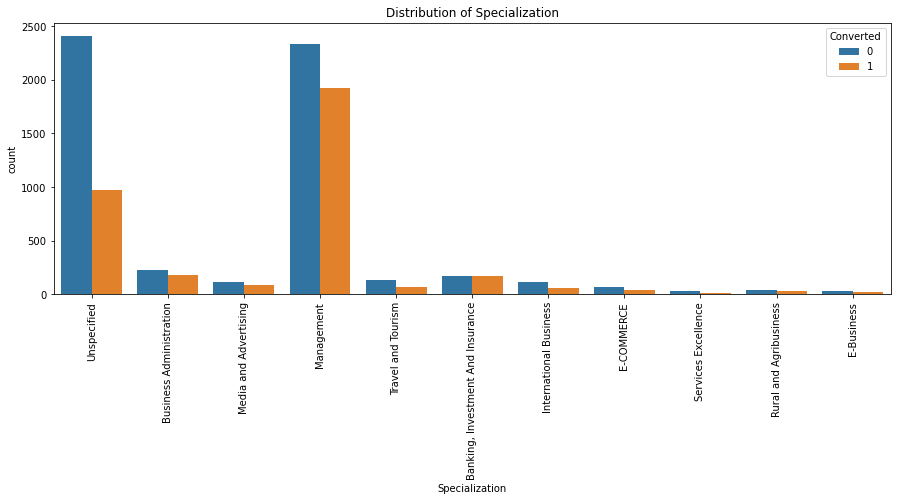

In [328]:
# Plot the Specialization varible to check distribution
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.title("Distribution of Specialization")
plt.show()

In [329]:
#Check value count for 'What is your current occupation'
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [330]:
#replace NaN with mode 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Unemployed')

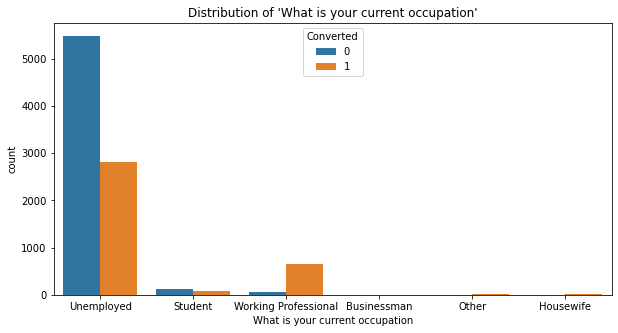

In [331]:
#plot the Occupation column to view the distribution among different occupations
plt.figure(figsize=(10,5))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels())
plt.title("Distribution of 'What is your current occupation'")
plt.show()

Through this visual we can clearly understand that Working professionals are more likely to convert whereas Unemployed are less likely to convert

In [332]:
#check value counts for 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can clearly see that most of the values are NaN and even if we replace NaNs with mode, this variable will be heavily skewed to just one value. Hence this variable is not good for analysis and we can drop

In [333]:
#add to drop_cols list
drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Country', 'What matters most to you in choosing a course']

In [334]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
NC_EDM                  1
testone                 1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [335]:
#replace NaNs with Others and google with Google
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['google','Google','bing'],'Search Engine')
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media')


In [336]:
#grouping low frequency values into one column 'Others'
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call','Press_Release',
                                                     'welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

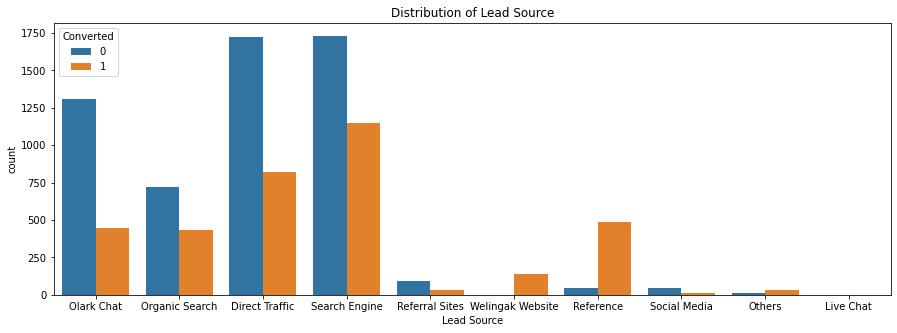

In [337]:
#plot the Lead Source variable
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels())
plt.title("Distribution of Lead Source")
plt.show()

We can see that Search Engine and Direct Traffic are the most common Lead Sources.

In [338]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [339]:
leads['Last Activity'] = leads['Last Activity'].replace(np.NaN,'Email Opened')

In [340]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [341]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

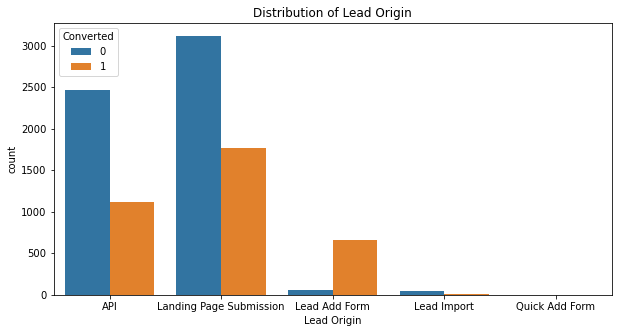

In [342]:
#plot the lead origin variable
plt.figure(figsize=(10,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels())
plt.title("Distribution of Lead Origin")
plt.show()

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but the count of leads is not very high.

In [343]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [344]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [345]:
#combine low frequency tags into one

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                       'wrong number given','Interested  in full time MBA','Closed by Horizzon','Lost to EINS'] , 'Others')

In [346]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [347]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [348]:
leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [349]:
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [350]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [351]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [352]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [353]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [354]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [355]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [356]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [357]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [358]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [359]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

All of these columns except 'A free copy of Mastering The Interview' are highly imbalanced and hence they can be dropped

In [360]:
#adding to list of columns to drop
drop_cols.extend(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content', 'Get updates on DM Content', 
 'I agree to pay the amount through cheque'])
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [361]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [362]:
#combining low frequency values to one group
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [363]:
leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [364]:
#### Dropping all the unnecessary columns
leads.drop(drop_cols,axis=1,inplace=True)

In [365]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [366]:
leads.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [367]:
leads.shape

(9240, 14)

#### Analyzing numerical columns

#### Imputing the numerical columns

The numerical columns with missing values can be imputed them with median

In [368]:
num_cols=['TotalVisits','Page Views Per Visit']

In [369]:
# Fill missing values with the median
for column in num_cols:
    leads[column].fillna(leads[column].median(), inplace=True)

In [370]:
# Let's now check the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Tags                                      0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
dtype: float64

#### Checking outliers

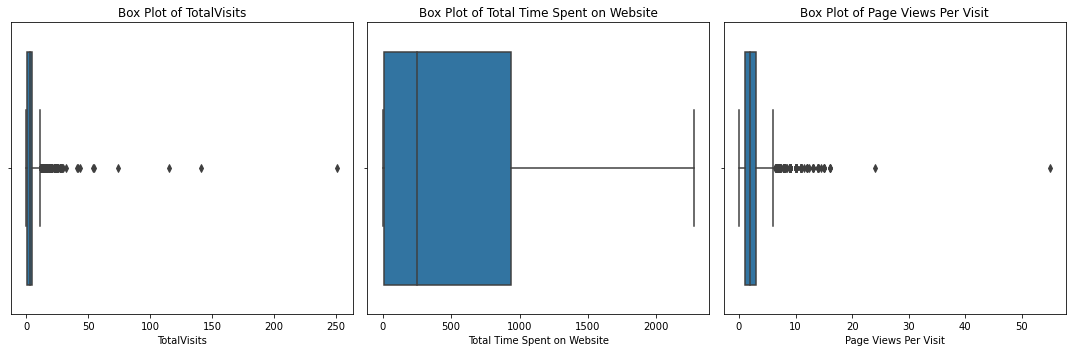

In [371]:
# Columns to check
columns_to_check = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each feature separately
for i, col in enumerate(columns_to_check):
    sns.boxplot(data=leads, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Adjust the layout
plt.tight_layout()
plt.show()

Total Visits and Page Views Per Visit has lot of outliers and we will treat them

In [372]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

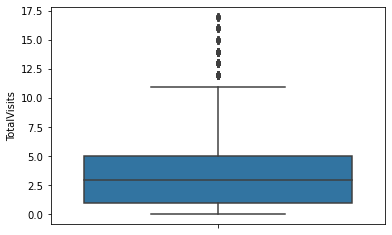

In [373]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [374]:
leads['Page Views Per Visit'].describe()

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

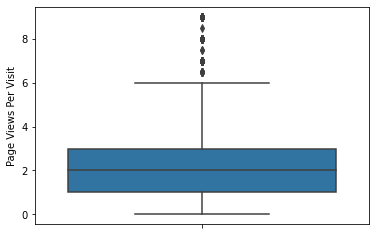

In [375]:
#Outlier Treatment: Remove top & bottom 1% 
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

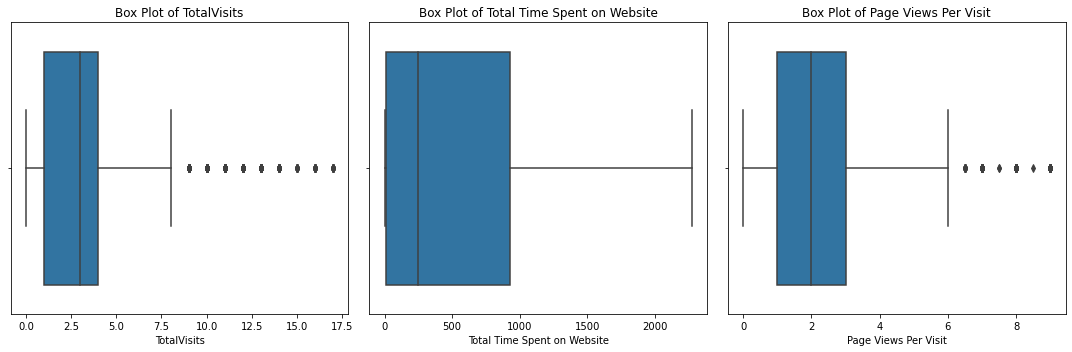

In [376]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each feature separately
for i, col in enumerate(columns_to_check):
    sns.boxplot(data=leads, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Adjust the layout
plt.tight_layout()
plt.show()

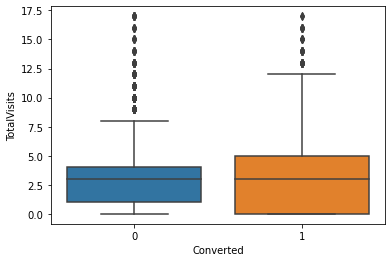

In [377]:
#Impact of total visits on Conversion
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

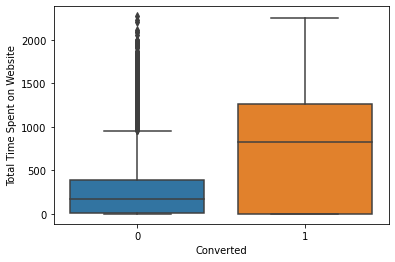

In [378]:
#checking the impact of Total time spent on website on conversion
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

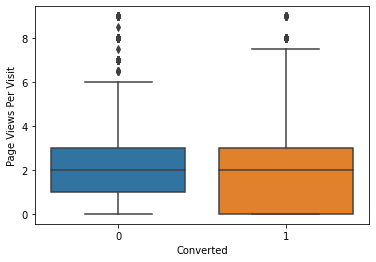

In [379]:
#checking the impact of Page views per visit on conversion
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [380]:
#checking missing values 
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [381]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [382]:
# List of variables to map
var =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[var] = leads[var].apply(binary_map)

In [383]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [384]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Unspecified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [385]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [386]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [387]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [388]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [389]:
leads.shape

(9090, 66)

In [390]:
# Drop the variables for which the dummy variables have been created

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1, inplace=True)

In [391]:
# Let's take a look at the dataset again

leads.shape

(9090, 56)

#### Check Imbalance

In [392]:
# Check for class imbalance
class_counts = leads['Converted'].value_counts()
class_counts

0    5595
1    3495
Name: Converted, dtype: int64

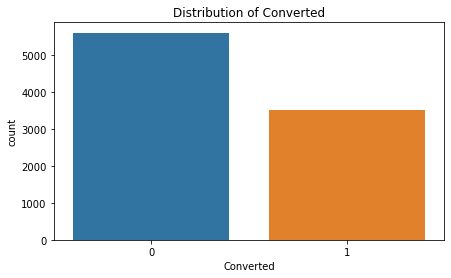

In [393]:
plt.figure(figsize=(7,4))
s1=sns.countplot(leads['Converted'])
s1.set_xticklabels(s1.get_xticklabels())
plt.title("Distribution of Converted")
plt.show()

In [394]:
# Calculate the percentage of each class
class_percentage = leads['Converted'].value_counts(normalize=True) * 100
class_percentage

0    61.551155
1    38.448845
Name: Converted, dtype: float64

In [395]:
# Imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.60


The data is not heavily imbalanced 

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [396]:
# Looking at the correlation table
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Converted,1.000000,0.043354,0.360298,-0.007582,-0.052359,0.324947,-0.023757,0.013271,0.041989,0.015092,...,-0.282434,0.645696,-0.118035,-0.120235,-0.039733,-0.016280,-0.034204,-0.213287,-0.079962,0.328455
TotalVisits,0.043354,1.000000,0.346250,0.721109,0.431367,-0.251111,-0.045658,-0.000513,-0.007381,0.021443,...,0.081589,0.053873,-0.095576,-0.063350,-0.028236,0.064650,0.023991,-0.208292,0.216304,0.018159
Total Time Spent on Website,0.360298,0.346250,1.000000,0.344210,0.277364,-0.139267,-0.034773,0.033214,0.007366,0.029163,...,-0.055687,0.259545,-0.009258,-0.027863,-0.040766,0.019669,0.009875,-0.192697,0.029101,0.116751
Page Views Per Visit,-0.007582,0.721109,0.344210,1.000000,0.536032,-0.286211,-0.051625,-0.001466,-0.007283,0.015884,...,0.127606,0.061468,-0.061616,-0.035935,-0.041172,0.069974,0.014093,-0.250993,0.105187,0.078551
Lead Origin_Landing Page Submission,-0.052359,0.431367,0.277364,0.536032,1.000000,-0.307426,-0.081967,-0.011020,-0.001638,-0.001938,...,0.133915,0.031821,0.044151,0.062993,-0.030835,0.031441,0.047887,-0.303172,0.086786,0.068787
Lead Origin_Lead Add Form,0.324947,-0.251111,-0.139267,-0.286211,-0.307426,1.000000,-0.022832,-0.003069,0.039536,-0.001085,...,-0.082402,0.185088,-0.065048,-0.029843,0.005289,0.022218,-0.018308,-0.094347,-0.045998,0.105741
Lead Origin_Lead Import,-0.023757,-0.045658,-0.034773,-0.051625,-0.081967,-0.022832,1.000000,-0.000818,-0.002589,-0.003064,...,0.054461,-0.004548,-0.017343,0.000303,-0.013494,0.057934,-0.008793,-0.026920,-0.020630,-0.013584
Lead Origin_Quick Add Form,0.013271,-0.000513,0.033214,-0.001466,-0.011020,-0.003069,-0.000818,1.000000,-0.000348,-0.000412,...,-0.004043,-0.005641,-0.002332,0.054559,-0.001814,-0.008286,-0.001182,-0.003619,-0.002773,-0.006831
What is your current occupation_Housewife,0.041989,-0.007381,0.007366,-0.007283,-0.001638,0.039536,-0.002589,-0.000348,1.000000,-0.001303,...,-0.012793,0.029889,-0.007377,-0.006380,0.014023,0.028363,0.026081,-0.011450,-0.008775,-0.021612
What is your current occupation_Other,0.015092,0.021443,0.029163,0.015884,-0.001938,-0.001085,-0.003064,-0.000412,-0.001303,1.000000,...,-0.015140,0.032683,-0.008730,-0.007551,-0.006793,0.015112,-0.004426,-0.004452,0.035021,-0.019442


In [397]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Test-Train Split

The next step is to split the dataset into train and test sets.

In [398]:
# Put all the feature variables in X
X = leads.drop('Converted', axis=1)

In [399]:
# Put the target variable in y
y = leads['Converted']

In [400]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [401]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
302,7.0,250,2.33,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6087,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1033,5.0,470,5.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7656,6.0,352,6.00,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3241,4.0,973,1.33,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [402]:
# Scale the three numeric features present in the dataset

scaler = StandardScaler()
# TotalVisits, Total Time Spent on Website, Page Views Per Visit
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
302,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6087,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1033,0.642022,-0.025151,1.477269,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7656,0.989402,-0.241619,2.014065,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3241,0.294642,0.897591,-0.492776,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [403]:
X_train.shape

(6363, 55)

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [404]:
#create a LogisticRegression object
logreg = LogisticRegression()

#### Feature Selection using RFE

In [405]:
# running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [406]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 24),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 20),
 ('What is your current occupation_Student', False, 7),
 ('What is your current occupation_Unemployed', False, 8),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 26),
 ('City_Other Cities of Maharashtra', False, 33),
 ('City_Other Metro Cities', False, 12),
 ('City_Thane & Outskirts', False, 36),
 ('City_Tier II Cities', False, 32),
 ('Specialization_Banking, Investment And Insurance', False, 30),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 10),
 ('Sp

In [407]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Search Engine', 'Lead Source_Welingak Website',
       'Last Notable Activity_SMS Sent', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent'],
      dtype='object')

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [408]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [409]:
X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Search Engine', 'Lead Source_Welingak Website',
       'Last Notable Activity_SMS Sent', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent'],
      dtype='object')

In [410]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.8
Date:                Tue, 17 Dec 2024   Deviance:                       3463.6
Time:                        23:33:21   Pearson chi2:                 1.47e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4533      0.116    -12.568      0.000      -1.680      -1.227
Total Time Spent on Website                              1.0884      0.050     21.818      0.000       0.991       1.186
Lead Origin_Lead Add Form                                2.8015      0.249     11.242      0.000       2.313       3.290
What is your current occupation_Housewife               21.7075   1.27e+04      0.002      0.999   -2.48e+04    2.49e+04
What is your current occupation_Working Professional     1.5784      0.261      6.051      0.000       1.067       2.090
Lead Source_Direct Traffic                              -1.1574      0.137     -8.435      0.000      -1.426      -0.888
Lead Source_Organic Search                              -1.1652      0.170     -6.869      0.000      -1.498      -0.833
Lead Source_Search Engine                               -0.8000      0.130     -6.139      0.000      -1.055      -0.545
Lead Source_Welingak Website                             2.8900      1.044      2.769      0.006       0.845       4.935
Last Notable Activity_SMS Sent                           1.7033      0.183      9.304      0.000       1.344       2.062
Tags_Interested in other courses                        -3.0122      0.424     -7.099      0.000      -3.844      -2.181
Tags_Ringing                                            -3.2922      0.232    -14.181      0.000      -3.747      -2.837
Tags_Will revert after reading the email                 3.7917      0.161     23.509      0.000       3.476       4.108
Last Activity_Email Bounced                             -1.4194      0.394     -3.599      0.000      -2.192      -0.646
Last Activity_Email Opened                               0.8239      0.111      7.416      0.000       0.606       1.042
Last Activity_SMS Sent                                   0.7867      0.180      4.361      0.000       0.433       1.140
========================================================================================================================
"""

There is one variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [411]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_SMS Sent,5.63
8,Last Notable Activity_SMS Sent,4.96
13,Last Activity_Email Opened,1.95
11,Tags_Will revert after reading the email,1.87
6,Lead Source_Search Engine,1.82
4,Lead Source_Direct Traffic,1.75
1,Lead Origin_Lead Add Form,1.68
3,What is your current occupation_Working Profes...,1.33
5,Lead Source_Organic Search,1.33
7,Lead Source_Welingak Website,1.31


VIFs seem to be in a decent range except for two variables. 
Let's first drop the variable `What is your current occupation_Housewife` since it has a high p-value as well as a high VIF.

In [412]:
# Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [413]:
drop_cols=['What is your current occupation_Housewife']
drop_cols

['What is your current occupation_Housewife']

In [414]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1827.4
Date:                Tue, 17 Dec 2024   Deviance:                       3654.8
Time:                        23:34:11   Pearson chi2:                 1.84e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Total Time Spent on Website                              1.3354      0.048     27.583      0.000       1.241       1.430
Lead Origin_Lead Add Form                                2.1528      0.248      8.685      0.000       1.667       2.639
What is your current occupation_Working Professional     1.5564      0.271      5.741      0.000       1.025       2.088
Lead Source_Direct Traffic                              -2.1763      0.115    -18.922      0.000      -2.402      -1.951
Lead Source_Organic Search                              -2.2090      0.153    -14.411      0.000      -2.509      -1.909
Lead Source_Search Engine                               -1.8290      0.105    -17.437      0.000      -2.035      -1.623
Lead Source_Welingak Website                             2.9669      1.047      2.834      0.005       0.915       5.019
Last Notable Activity_SMS Sent                           1.7602      0.190      9.287      0.000       1.389       2.132
Tags_Interested in other courses                        -3.5660      0.429     -8.317      0.000      -4.406      -2.726
Tags_Ringing                                            -3.4719      0.235    -14.767      0.000      -3.933      -3.011
Tags_Will revert after reading the email                 3.7812      0.165     22.955      0.000       3.458       4.104
Last Activity_Email Bounced                             -2.2037      0.401     -5.495      0.000      -2.990      -1.418
Last Activity_Email Opened                               0.0774      0.088      0.877      0.381      -0.096       0.251
Last Activity_SMS Sent                                   0.1000      0.174      0.576      0.564      -0.240       0.440
========================================================================================================================
"""

The variable `Last Activity_Email Opened` also needs to be dropped.

In [415]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,Last Activity_SMS Sent,5.63
7,Last Notable Activity_SMS Sent,4.96
12,Last Activity_Email Opened,1.95
10,Tags_Will revert after reading the email,1.86
5,Lead Source_Search Engine,1.82
3,Lead Source_Direct Traffic,1.75
1,Lead Origin_Lead Add Form,1.68
4,Lead Source_Organic Search,1.33
2,What is your current occupation_Working Profes...,1.32
6,Lead Source_Welingak Website,1.31


In [416]:

X_train.drop('Last Activity_Email Opened', axis=1, inplace=True)

In [417]:
drop_cols.append('Last Activity_Email Opened')
drop_cols

['What is your current occupation_Housewife', 'Last Activity_Email Opened']

In [418]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1764.1
Date:                Tue, 17 Dec 2024   Deviance:                       3528.3
Time:                        23:35:52   Pearson chi2:                 1.41e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0193      0.095    -10.744      0.000      -1.205      -0.833
Total Time Spent on Website                              1.0884      0.049     22.020      0.000       0.992       1.185
Lead Origin_Lead Add Form                                2.9221      0.248     11.790      0.000       2.436       3.408
What is your current occupation_Working Professional     1.5899      0.264      6.026      0.000       1.073       2.107
Lead Source_Direct Traffic                              -1.0733      0.136     -7.914      0.000      -1.339      -0.807
Lead Source_Organic Search                              -1.1094      0.168     -6.592      0.000      -1.439      -0.780
Lead Source_Search Engine                               -0.7270      0.128     -5.662      0.000      -0.979      -0.475
Lead Source_Welingak Website                             2.9682      1.042      2.850      0.004       0.927       5.010
Last Notable Activity_SMS Sent                           1.7077      0.184      9.303      0.000       1.348       2.067
Tags_Interested in other courses                        -3.0361      0.419     -7.253      0.000      -3.857      -2.216
Tags_Ringing                                            -3.2601      0.233    -13.969      0.000      -3.718      -2.803
Tags_Will revert after reading the email                 3.8253      0.159     23.984      0.000       3.513       4.138
Last Activity_Email Bounced                             -1.9288      0.390     -4.949      0.000      -2.693      -1.165
Last Activity_SMS Sent                                   0.2827      0.166      1.702      0.089      -0.043       0.608
========================================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [419]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_SMS Sent,5.24
7,Last Notable Activity_SMS Sent,4.96
10,Tags_Will revert after reading the email,1.81
1,Lead Origin_Lead Add Form,1.57
5,Lead Source_Search Engine,1.40
3,Lead Source_Direct Traffic,1.36
2,What is your current occupation_Working Profes...,1.32
6,Lead Source_Welingak Website,1.31
9,Tags_Ringing,1.27
4,Lead Source_Organic Search,1.18


In [420]:
X_train.drop('Last Activity_SMS Sent', axis=1, inplace=True)

In [421]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1765.6
Date:                Tue, 17 Dec 2024   Deviance:                       3531.1
Time:                        23:37:44   Pearson chi2:                 1.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0012      0.094    -10.639      0.000      -1.186      -0.817
Total Time Spent on Website                              1.0900      0.049     22.040      0.000       0.993       1.187
Lead Origin_Lead Add Form                                2.9484      0.247     11.928      0.000       2.464       3.433
What is your current occupation_Working Professional     1.5864      0.264      6.017      0.000       1.070       2.103
Lead Source_Direct Traffic                              -1.0589      0.135     -7.829      0.000      -1.324      -0.794
Lead Source_Organic Search                              -1.0963      0.168     -6.525      0.000      -1.426      -0.767
Lead Source_Search Engine                               -0.7141      0.128     -5.578      0.000      -0.965      -0.463
Lead Source_Welingak Website                             2.9907      1.041      2.873      0.004       0.950       5.031
Last Notable Activity_SMS Sent                           1.9623      0.108     18.205      0.000       1.751       2.174
Tags_Interested in other courses                        -3.0472      0.419     -7.279      0.000      -3.868      -2.227
Tags_Ringing                                            -3.2674      0.233    -13.996      0.000      -3.725      -2.810
Tags_Will revert after reading the email                 3.8180      0.159     23.972      0.000       3.506       4.130
Last Activity_Email Bounced                             -1.9601      0.389     -5.033      0.000      -2.723      -1.197
========================================================================================================================
"""

In [422]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.81
1,Lead Origin_Lead Add Form,1.56
7,Last Notable Activity_SMS Sent,1.47
5,Lead Source_Search Engine,1.34
2,What is your current occupation_Working Profes...,1.32
3,Lead Source_Direct Traffic,1.32
6,Lead Source_Welingak Website,1.31
9,Tags_Ringing,1.27
4,Lead Source_Organic Search,1.16
0,Total Time Spent on Website,1.14


The VIFs are below 5 and we are good to go

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [423]:
X_train_sm.shape

(6363, 13)

In [424]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.187176
6087    0.019295
1033    0.148969
7656    0.025867
3241    0.990974
5738    0.049206
7366    0.122566
3680    0.059786
4170    0.990152
43      0.096338
dtype: float64

In [425]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18717591, 0.01929453, 0.14896905, 0.02586742, 0.99097369,
       0.04920556, 0.12256609, 0.05978586, 0.99015175, 0.09633768])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [426]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.187176,302
1,0,0.019295,6087
2,0,0.148969,1033
3,0,0.025867,7656
4,1,0.990974,3241


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [427]:
# Create a new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.187176,302,0
1,0,0.019295,6087,0
2,0,0.148969,1033,0
3,0,0.025867,7656,0
4,1,0.990974,3241,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [428]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [429]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [430]:
confusion

array([[3733,  202],
       [ 519, 1909]], dtype=int64)

In [431]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8866886688668867


In [432]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [433]:
# Calculate the sensitivity

TP/(TP+FN)

0.7862438220757826

In [434]:
# Calculate the specificity

TN/(TN+FP)

0.9486658195679797

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [435]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [436]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

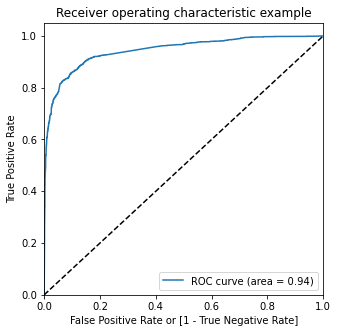

In [437]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.97 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [438]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187176,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.019295,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.148969,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.025867,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.990974,3241,1,1,1,1,1,1,1,1,1,1,1


In [439]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381581     1.000000     0.000000
0.1   0.1  0.707685     0.964168     0.549428
0.2   0.2  0.867515     0.911862     0.840152
0.3   0.3  0.877102     0.881384     0.874460
0.4   0.4  0.884960     0.843081     0.910801
0.5   0.5  0.886689     0.786244     0.948666
0.6   0.6  0.885746     0.759885     0.963405
0.7   0.7  0.880717     0.732702     0.972046
0.8   0.8  0.860915     0.663921     0.982465
0.9   0.9  0.839070     0.592257     0.991360


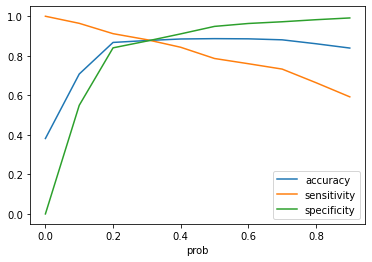

In [440]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

As you can see that around 0.25, you get the optimal values of the three metrics. So let's choose 0.25 as our cutoff now.

In [441]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187176,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.019295,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.148969,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.025867,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.990974,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [442]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8717586044318718

In [443]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3365,  570],
       [ 246, 2182]], dtype=int64)

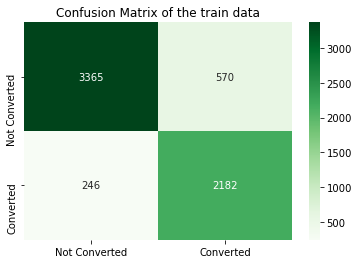

In [444]:
#plot confusion matrix
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted']) 
plt.title('Confusion Matrix of the train data') 
plt.show() 


In [445]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [446]:
# Calculate Sensitivity
TP/(TP+FN)

0.8986820428336079

In [447]:
# Calculate Specificity
TN/(TN+FP)

0.855146124523507

This cutoff point seems good to go!

In [448]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/(TN+FP))

0.144853875476493


In [449]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7928779069767442


In [450]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9318748269177514


In [451]:
##### Precision
TP / (TP + FP)

0.7928779069767442

In [452]:
##### Recall
TP / (TP + FN)

0.8986820428336079

In [453]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [454]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7928779069767442

In [455]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8986820428336079

In [456]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

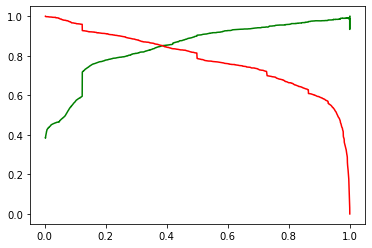

In [457]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Inference
* The ROC curve has a value of 0.94, which is very good and below are the evaluation metrics obtained for train data
* Accuracy : 87%
* Sensitivity : 89%
* Specificity : 85%


In [458]:
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Search Engine,Lead Source_Welingak Website,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Email Bounced
302,-0.428736,0,0,0,0,0,0,0,0,0,0,0
6087,-0.887355,0,0,0,0,0,0,0,0,0,0,1
1033,-0.025151,0,0,0,0,1,0,0,0,0,0,0
7656,-0.241619,0,0,1,0,0,0,1,0,1,0,0
3241,0.897591,0,0,1,0,0,0,1,0,0,1,0


## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [459]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
6906,0.306196,1.891958,-0.154745,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1873,-0.386173,-0.542475,-0.154745,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
771,1.344750,-0.790628,2.446282,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4495,0.306196,-0.618551,0.885666,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9061,-0.386173,2.359282,-0.154745,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [460]:
col = X_train.columns

In [461]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Search Engine', 'Lead Source_Welingak Website',
       'Last Notable Activity_SMS Sent', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Activity_Email Bounced'],
      dtype='object')

In [462]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Search Engine,Lead Source_Welingak Website,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Email Bounced
6906,1.891958,0,0,1,0,0,0,1,0,0,1,0
1873,-0.542475,0,0,0,0,1,0,0,1,0,0,0
771,-0.790628,0,0,0,0,1,0,0,0,1,0,0
4495,-0.618551,0,0,0,0,1,0,0,0,1,0,0
9061,2.359282,0,0,1,0,0,0,0,0,0,0,0


In [463]:
X_test.shape

(2727, 12)

In [464]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [465]:
# Check X_test_sm
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Search Engine,Lead Source_Welingak Website,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Email Bounced
6906,1.0,1.891958,0,0,1,0,0,0,1,0,0,1,0
1873,1.0,-0.542475,0,0,0,0,1,0,0,1,0,0,0
771,1.0,-0.790628,0,0,0,0,1,0,0,0,1,0,0
4495,1.0,-0.618551,0,0,0,0,1,0,0,0,1,0,0
9061,1.0,2.359282,0,0,1,0,0,0,0,0,0,0,0


In [466]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [467]:
y_test_pred[:10]

6906    0.996928
1873    0.004708
771     0.002887
4495    0.003481
9061    0.625156
4929    0.384973
2308    0.091292
1034    0.066226
9033    0.002865
7008    0.891731
dtype: float64

In [468]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [469]:
# Let's see the head
y_pred_1.head()

,0
6906,0.996928
1873,0.004708
771,0.002887
4495,0.003481
9061,0.625156


In [470]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [471]:
# Add cust id
y_test_df['Prospect ID'] = y_test_df.index

In [472]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [473]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [474]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.996928
1,0,1873,0.004708
2,0,771,0.002887
3,0,4495,0.003481
4,1,9061,0.625156


In [475]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,6906,0.996928
1,0,1873,0.004708
2,0,771,0.002887
3,0,4495,0.003481
4,1,9061,0.625156


In [476]:
#calcualate lead score
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [477]:
# Make predictions on the test set using 0.2 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,6906,1,0.996928,100,1
1,1873,0,0.004708,0,0
2,771,0,0.002887,0,0
3,4495,0,0.003481,0,0
4,9061,1,0.625156,63,1


In [478]:
# Check y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,6906,1,0.996928,100,1
1,1873,0,0.004708,0,0
2,771,0,0.002887,0,0
3,4495,0,0.003481,0,0
4,9061,1,0.625156,63,1


In [479]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8778877887788779

In [480]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1437,  223],
       [ 110,  957]], dtype=int64)

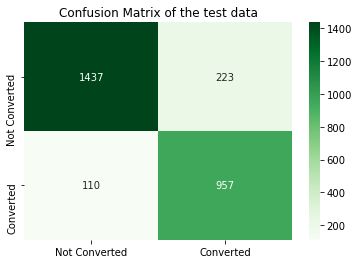

In [481]:
#plot confusion matrix
sns.heatmap(confusion3, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted']) 
plt.title('Confusion Matrix of the test data') 
plt.show() 


In [482]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [483]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8969072164948454

In [484]:
# Let us calculate specificity
TN / (TN+FP)

0.8656626506024097

In [485]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8110169491525424

In [486]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8969072164948454

Comparison of evaluation metrics from both train and test data

Train Data
Accuracy : 87%
* Sensitivity : 89%
* Specificity : 85%

    
Test Data 
* Accuracy : 87%
* Sensitivity : 89%
* Specificity : 86%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model